# Muliticlass classification - mnist data set

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from tensorflow.keras.datasets import fashion_mnist

In [15]:
# import data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# show example
print(f"Training sample shape: {X_train[0].shape}\n")
print(f"Train label.shape: {y_train[0].shape}")

Training sample shape: (28, 28)

Train label.shape: ()


Text(0.5, 1.0, 'Sneaker')

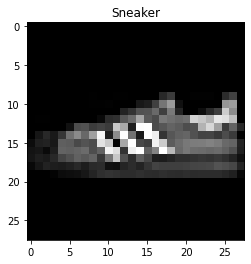

In [12]:
# list of training label
import random
index = random.choice(range(len(X_train)))
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)
# plot sample
plt.imshow(X_train[index], cmap=plt.cm.binary_r)
plt.title(class_names[y_train[index]])

In [16]:
# normalize
X_train = X_train/255.0
X_test = X_test/255.0

X_train.min(), X_train.max()

(0.0, 1.0)

In [28]:
# Building multiclass model to check lr

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape), # images have to be flatten
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compaile the model

# you have to remember:
# CategoricalCrossentropy() - one hot encoding
# SparseCategorogicalCrossentropy - encoding with int

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
non_norm_history = model.fit(X_train,
                            tf.expand_dims(y_train, axis=-1), #tf.one_hot(y_train, depth = 10 )
                            epochs = 30,
                            validation_data = (X_test, y_test),
                            callbacks = [lr_scheduler]
                            ) 

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2802 - accuracy: 0.5524 - val_loss: 0.9583 - val_accuracy: 0.6658 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8391 - accuracy: 0.6912 - val_loss: 0.8106 - val_accuracy: 0.6891 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7528 - accuracy: 0.7092 - val_loss: 0.7545 - val_accuracy: 0.7133 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7145 - accuracy: 0.7193 - val_loss: 0.7398 - val_accuracy: 0.7190 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6843 - accuracy: 0.7276 - val_loss: 0.7119 - val_accuracy: 0.7195 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6687 - accuracy: 0.7323 - val_loss: 0.6855 - val_accuracy: 0.7315 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] -

Text(0.5, 1.0, 'Learning rate vs loss')

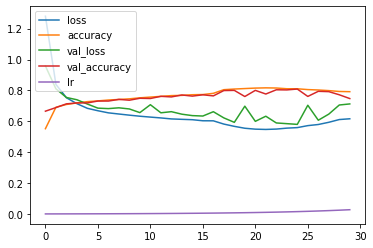

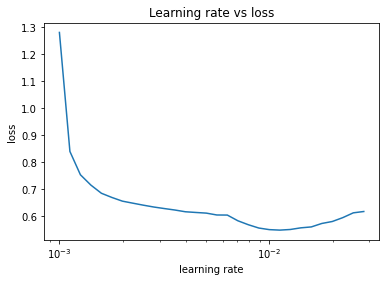

In [29]:
# LR decay plot
lrs = 1e-3 * 10 ** (np.arange(30)/20)
plt.figure()
plt.semilogx(lrs, non_norm_history.history["loss"])
plt.ylabel("loss")
plt.xlabel("learning rate")
plt.title("Learning rate vs loss")

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Building multiclass final model with correct lr with 20 epochs

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape), # images have to be flatten
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compaile the model

# you have to remember:
# CategoricalCrossentropy() - one hot encoding
# SparseCategorogicalCrossentropy - encoding with int

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit the model
non_norm_history = model.fit(X_train,
                            tf.expand_dims(y_train, axis=-1), #tf.one_hot(y_train, depth = 10 )
                            epochs = 20,
                            validation_data = (X_test, y_test),
                            ) 

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2832 - accuracy: 0.5466 - val_loss: 0.9705 - val_accuracy: 0.6755
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8549 - accuracy: 0.7034 - val_loss: 0.8321 - val_accuracy: 0.7027
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7581 - accuracy: 0.7261 - val_loss: 0.7730 - val_accuracy: 0.7149
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7122 - accuracy: 0.7551 - val_loss: 0.7216 - val_accuracy: 0.7631
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6702 - accuracy: 0.7812 - val_loss: 0.6962 - val_accuracy: 0.7713
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6458 - accuracy: 0.7882 - val_loss: 0.6699 - val_accuracy: 0.7797
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6270 - accuracy: 0.7928 - val_loss: 0.6563 - val_accur

<AxesSubplot:>

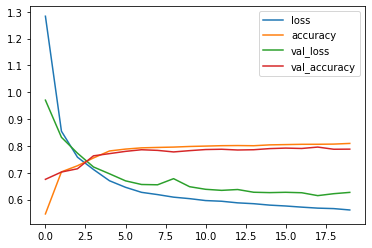

In [31]:
pd.DataFrame(non_norm_history.history).plot()

In [43]:
pred = model.predict(X_test)
pred[0]

array([7.0866663e-04, 3.1277992e-05, 1.6500446e-04, 3.9556888e-03,
       8.5335999e-04, 2.0831920e-01, 1.6431807e-03, 4.4639713e-01,
       2.0179602e-03, 3.3590856e-01], dtype=float32)

In [44]:
# convert prediction probability to integers
pred = pred.argmax(axis = 1)
pred

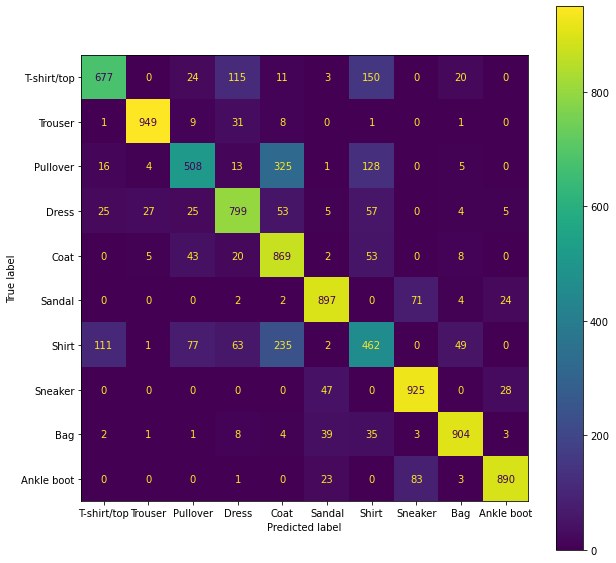

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(conf, display_labels = class_names)

fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax =ax)


In [62]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

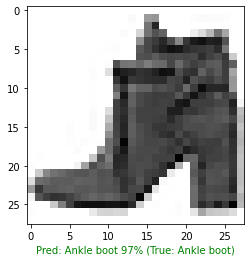

In [63]:
# Check out a random image as well as its prediction
plot_random_image(model=model, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)